In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
car_data = pd.read_csv('../data/raw/car_data.csv').dropna()

In [3]:
car_data.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [5]:
car_data.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,21.087591,23.748175,5.315693,2.931752,28.346715,2019.009124
std,5.328307,5.268521,1.759999,1.248419,5.279764,3.167175
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,55.000000,52.000000,12.000000,6.800000,52.000000,2024.000000


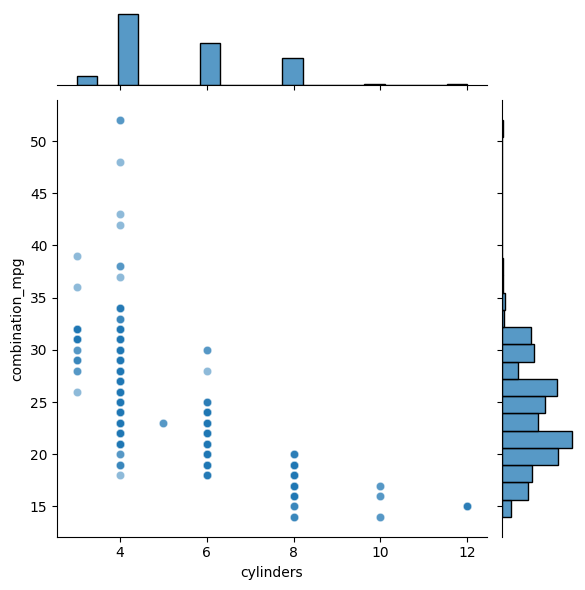

In [6]:
sns.jointplot(x='cylinders', y='combination_mpg', data=car_data, alpha=0.5)

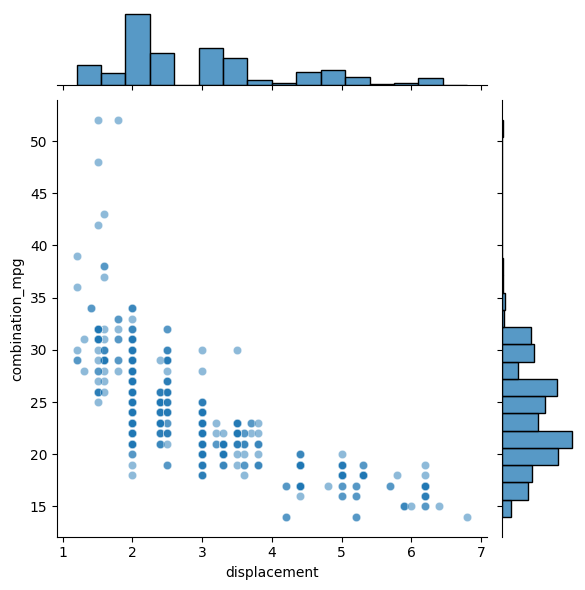

In [9]:
sns.jointplot(x='displacement', y='combination_mpg', data=car_data, alpha=0.5)

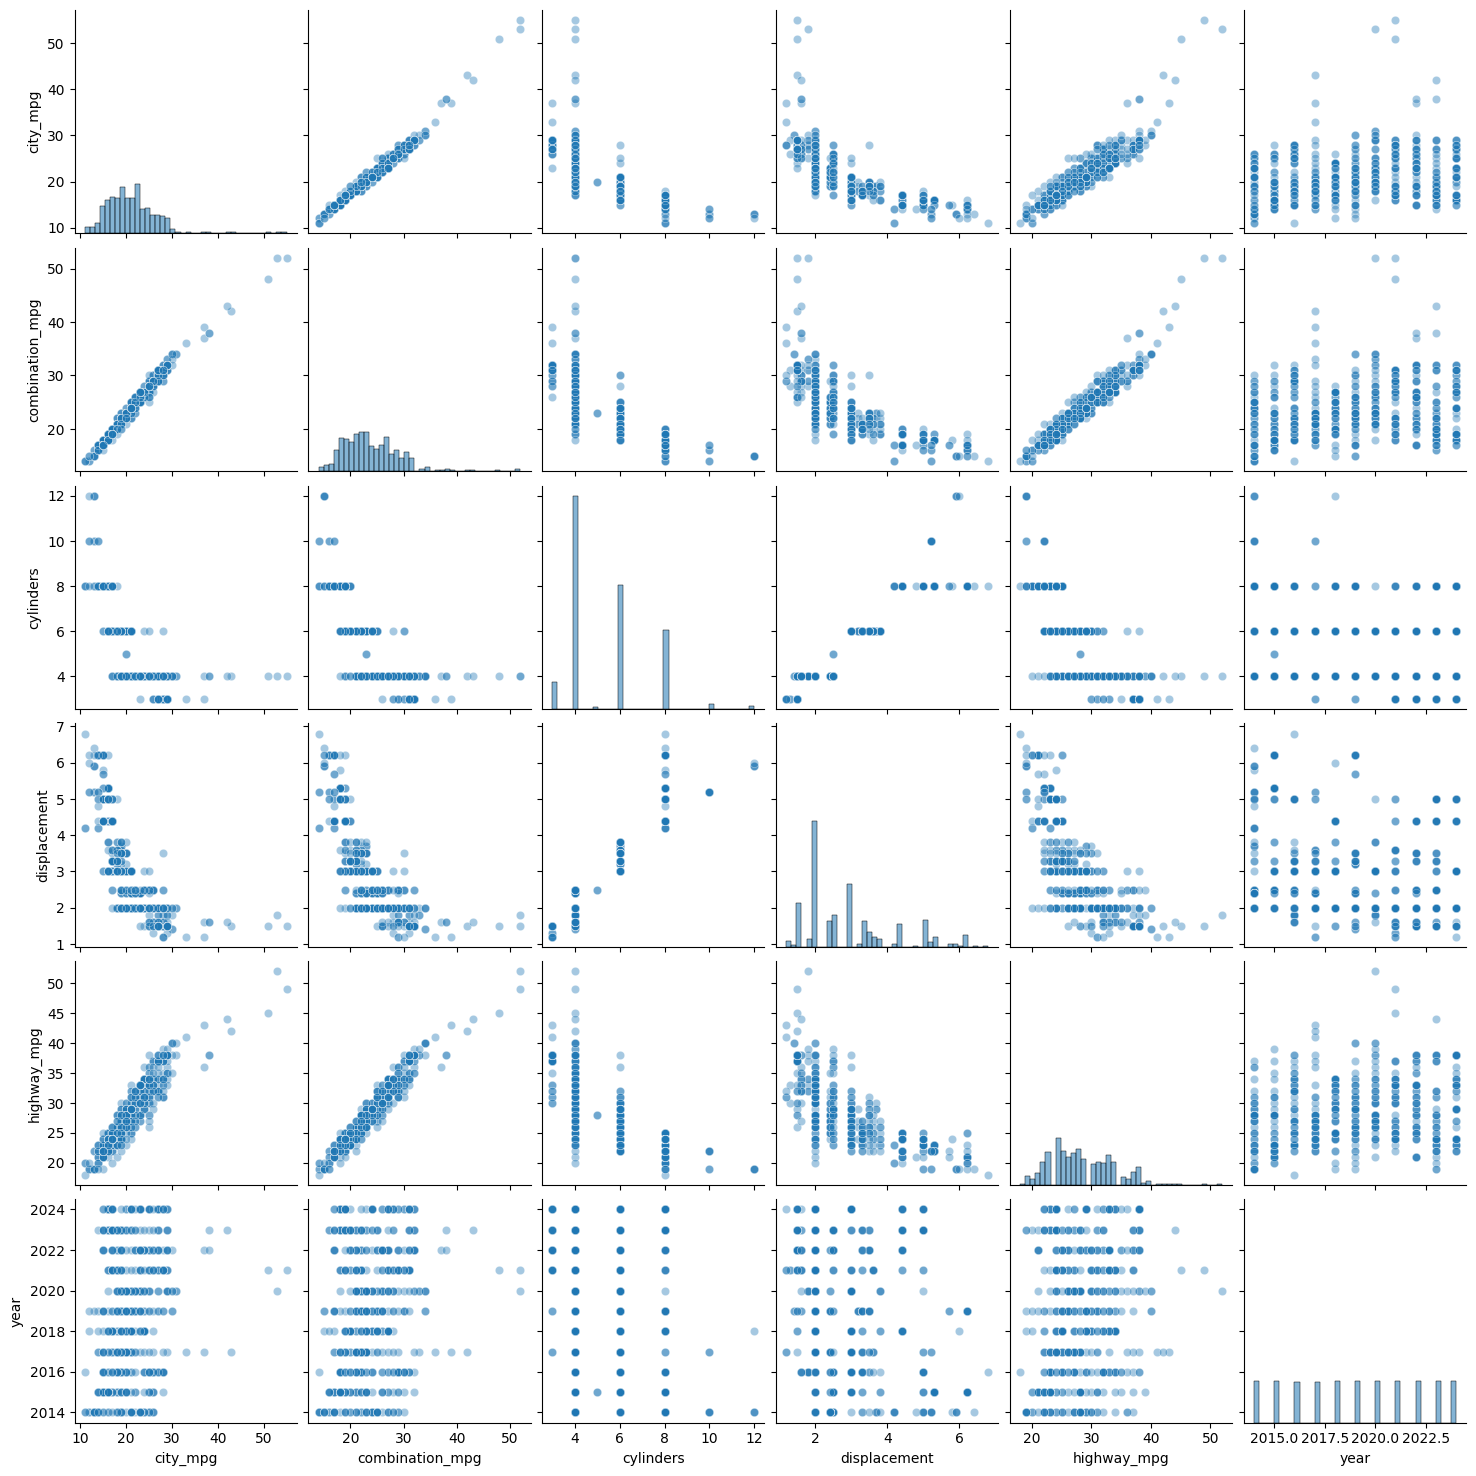

In [12]:
sns.pairplot(car_data, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

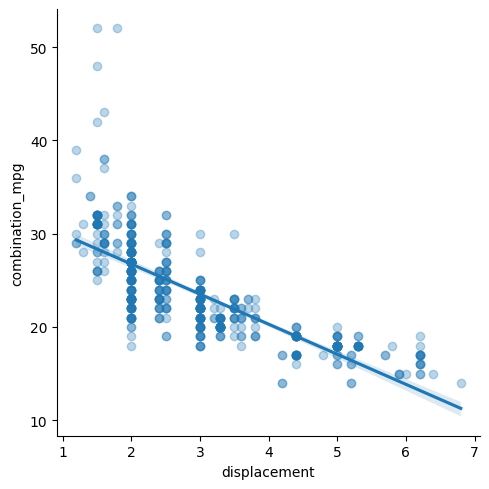

In [13]:
# length of membership vs yearly amount spent
sns.lmplot(x='displacement', 
           y='combination_mpg', 
           data=car_data,
           scatter_kws={'alpha':0.3})


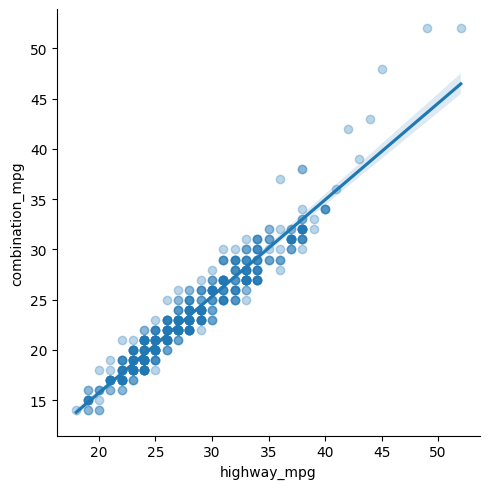

In [19]:
sns.lmplot(x='highway_mpg',
           y='combination_mpg',
           data=car_data,
           scatter_kws={'alpha':0.3})

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [16]:
df_encoded = pd.get_dummies(car_data, columns=['class', 'drive', 'fuel_type', 'make', 'model', 'transmission'], drop_first=True)

In [17]:
X = df_encoded.drop(['combination_mpg', 'city_mpg', 'highway_mpg'], axis=1)
y = car_data['combination_mpg']

In [18]:
X = X.apply(pd.to_numeric, errors='coerce')

In [20]:
X = X.dropna()
y = y[X.index]

In [21]:
X = sm.add_constant(X)

In [22]:
X.head()
y.head()

0    29
1    30
2    27
3    29
4    28
Name: combination_mpg, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
lm = LinearRegression()


In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
# the coefficients
lm.coef_

array([ 7.43184387e-15, -1.68383961e+00,  7.72696515e-01,  8.54890468e-02,
       -1.91074688e+00,  5.19471291e-01, -1.06521997e+00,  1.85507651e-01,
       -6.09691926e+00, -5.43913543e+00, -2.37634671e+00,  2.24258780e-01,
       -2.63076250e+00, -3.91570025e+00, -1.39670979e-01, -2.63934227e+00,
       -1.28022928e-01,  2.69147772e+00, -2.79730944e-01, -6.00000000e+00,
       -1.84119300e-01,  4.23895658e-01,  1.15463195e-14, -1.45587641e+00,
       -1.34412807e+00, -1.41528859e+00, -3.96877184e-01,  6.45073574e-01,
       -2.99902159e-01, -1.75452471e+00, -4.59814653e-01,  7.49733227e+00,
        1.40837282e+00,  7.84654686e-01, -4.47172106e-01, -1.09099584e+00,
       -2.07088666e-01, -1.41617122e+00,  1.28706149e+00, -3.73074332e-01,
       -9.74624534e-01,  1.39690809e+00, -2.36944989e+00, -1.20247611e-01,
       -2.63076250e+00, -1.75991887e+00, -7.60636216e-01,  9.20332261e+00,
       -1.73850977e-01, -4.90713422e-01, -2.79730944e-01,  2.37215200e+00,
        2.78666295e+00,  

In [41]:

# r squared
lm.score(X, y)


0.9231662300115152

In [42]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                                  Coef
const                     7.431844e-15
cylinders                -1.683840e+00
displacement              7.726965e-01
year                      8.548905e-02
class_large car          -1.910747e+00
...                                ...
model_yukon c1500 xl 2wd -8.268873e-02
model_yukon k1500 4wd     4.852938e-01
model_yukon k1500 xl 4wd -8.624197e-01
model_z4 sdrive28i        0.000000e+00
transmission_m           -1.267367e+00

[325 rows x 1 columns]


In [43]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'combination_mpg vs. Model Predictions')

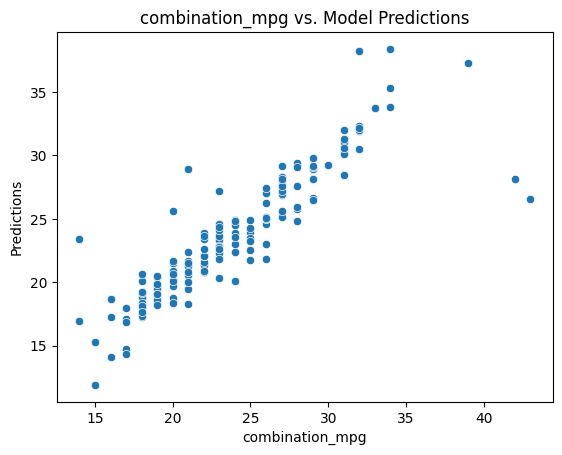

In [31]:

sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('combination_mpg vs. Model Predictions')

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [33]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.3908970846964999
Mean Squared Error: 6.068219099408106
Root Mean Squared Error: 2.463375549811296


C:\Users\123\AppData\Local\Temp\ipykernel_72860\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='combination_mpg', ylabel='Density'>

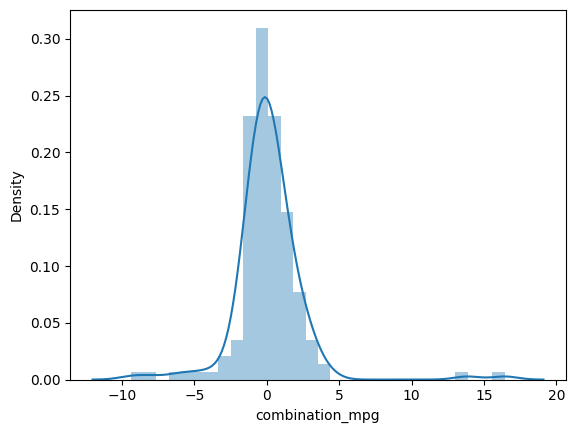

In [34]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

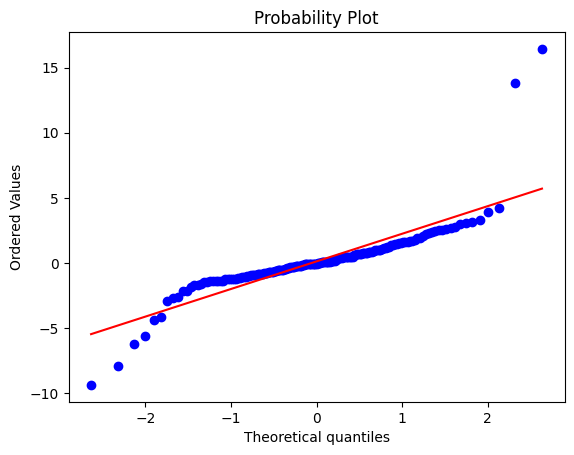

In [35]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()